In [ ]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt
from scipy.stats import f_oneway

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro

In [ ]:
four_sessions = pd.read_csv('four_sessions.csv')
four_sessions.head()


,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [ ]:
# Performing Shapiro-Wilk test for each page
for page in four_sessions['Page'].unique():
    stat, p_value = shapiro(four_sessions[four_sessions['Page'] == page]['Time'])
    print(f"Page {page} - Shapiro-Wilk Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

    if p_value > 0.05:
        print("   Data looks normally distributed.\n")
    else:
        print("   Data does NOT look normally distributed.\n")


Page Page 1 - Shapiro-Wilk Test Statistic: 0.9697, P-value: 0.8732
   Data looks normally distributed.

Page Page 2 - Shapiro-Wilk Test Statistic: 0.9356, P-value: 0.6350
   Data looks normally distributed.

Page Page 3 - Shapiro-Wilk Test Statistic: 0.9254, P-value: 0.5653
   Data looks normally distributed.

Page Page 4 - Shapiro-Wilk Test Statistic: 0.8844, P-value: 0.3299
   Data looks normally distributed.



In [ ]:
from scipy.stats import levene

# Perform Levene's test
stat, p_value = levene(four_sessions[four_sessions.Page == 'Page 1']['Time'],
                      four_sessions[four_sessions.Page == 'Page 2']['Time'],
                      four_sessions[four_sessions.Page == 'Page 3']['Time'],
                      four_sessions[four_sessions.Page == 'Page 4']['Time'])

print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value > 0.05:
    print("Variances are equal (homogeneity holds).\n")
else:
    print("Variances are NOT equal (homogeneity violated).\n")


Levene's Test Statistic: 1.0821, P-value: 0.3849
Variances are equal (homogeneity holds).



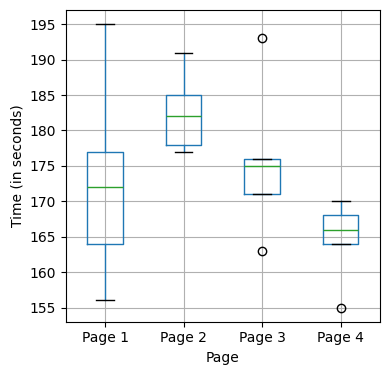

In [ ]:
ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

**ANOVA**

In [ ]:
#A linear regression model is fit using the formula: Time ~ Page.
model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


**Interpreting the table:**

Degrees of Freedom (df):

Page has 𝑑𝑓 = 3 because we're comparing 4 groups, and
𝑑𝑓
group
=
𝑘
−
1
where k=4.

Residual (within-group variance) has 𝑑𝑓 = 16. For
𝑛
n total data points and
𝑘
=
4
groups:
𝑑𝑓
residual
=
𝑛
−
𝑘
=
20
−
4
=
16


**Sum of Squares (sum_sq):**

Page (Between-Group Sum of Squares):

831.4 measures the variability between the group means.

Residual (Within-Group Sum of Squares):

1618.4 measures the variability within each group (noise).


**Mean Square (mean_sq):**

Mean Square = Sum of Squares ÷ Degrees of Freedom.

Page:
277.1333
=
831.4/
3
​

Residual:
101.15
=
1618.4/
16
​


**F-Statistic:**

𝐹
=
Mean Sq (Page)/
Mean Sq (Residual)
=
277.133/
101.15
≈
2.7398


The F-statistic compares the variance between groups to the variance within groups.

**PR(>F) (P-Value):**

p = 0.0776: This is slightly above the standard significance level (
α=0.05).

Conclusion: There is not enough evidence to say the group means (session times for Pages 1–4) are significantly different.



**Another way cuz why not:**

In [ ]:
f_statistic, p_value = f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("At least one group mean is different (Reject H0).")
else:
    print("No significant difference between group means (Fail to reject H0).")

F-Statistic: 2.739825341901467
P-value: 0.0775862152580146
No significant difference between group means (Fail to reject H0).


**Pairwise comparisons :**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Page 1 Page 2      9.8 0.4379  -8.3984 27.9984  False
Page 1 Page 3      2.8 0.9706 -15.3984 20.9984  False
Page 1 Page 4     -8.2 0.5825 -26.3984  9.9984  False
Page 2 Page 3     -7.0 0.6943 -25.1984 11.1984  False
Page 2 Page 4    -18.0 0.0531 -36.1984  0.1984  False
Page 3 Page 4    -11.0 0.3416 -29.1984  7.1984  False
-----------------------------------------------------


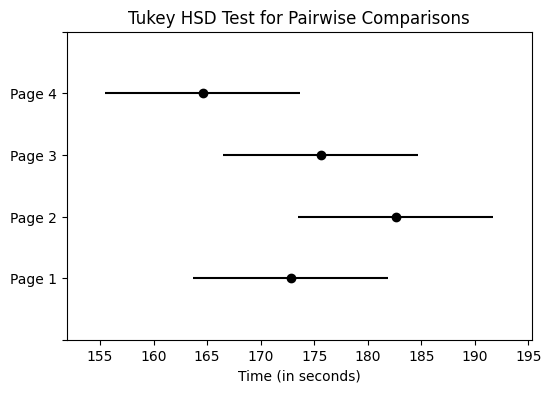

In [ ]:
# Run Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=four_sessions['Time'],   # dependent variable
                          groups=four_sessions['Page'],  # independent variable
                          alpha=0.05)  # significance level

# Print results
print(tukey)

# Plot the Tukey HSD results
fig = tukey.plot_simultaneous()
fig.set_size_inches(6, 4)
plt.xlabel('Time (in seconds)')
plt.title('Tukey HSD Test for Pairwise Comparisons')
plt.show()


**Black dots:** Represent the mean session time for each group.

**Horizontal lines:** Represent the confidence intervals (95%) for the mean times of each group.





Here, the confidence intervals overlap across all pairs of groups, which means:

There are no significant differences in mean session times between any two groups which aligns with the Tukey HSD test table results where reject = False for all pairwise comparisons.



The width of the horizontal line reflects the variability within each group.
- If a group has a wider confidence interval, it has greater variability in its session times.
- For instance, the confidence intervals appear roughly similar in width, indicating similar levels of variability between the groups.

**Tukey HSD provides strong visual evidence that there is insufficient support to conclude meaningful pairwise differences (i.e no statically significant differences between the groups).**